Project Description
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


In [1]:
# importing necessary Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing Dataset.
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Detecting Churn is the Target of this Model,Hence it is a classification Model .
# Churn is our Target Variable.

In [5]:
data.shape

(7043, 21)

In [6]:
# we have 7043 rows and 21 columns in our Dataset.

In [7]:
# To See the Datacolumns.
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# to check the information about the columns:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#observations:
# There is No Null values present.
# we have float-(01),int-02 and object(18) columns.
# will analyse further with EDA

In [10]:
# Information About Columns:
#1.Cust Id: Unique Id of the customer.
#2 Gender: gender of the Customers
#3 SeniorCitizen: Are they Senior citizen are not (age above 60)
#4 Partner : Whether they have partners for the customers
#5 Dependants: Whether customers have any dependents.
#6 Tenure: Tenure of their contract.
#7 Phoneservices:whether they have taken Phone services with the Telecommunications.
#8 Multiplelines: Whether the customers have taken Multipleline with the same Telecommunications.
#9 Internetservices: Type of Internet service,the customers have taken.
#10 Onlinesecurity: whether they have taken Onlinesecurity or not.
#11 DeviceProtection: Whether they have taken Device protection or not.
#12 TechSupport: whether there is techsupport or not,
#13/14 Streaming Tv/Movies: Whether they have taken streaming device or not.
#15 Contract-whether the contract is month to Month/year.
#16 Paperless -Building: whether thay have taken the paperless billing or not
# 17 Payment method:  what is their way of doing payment for the contract.
# 18.Monthly Charges: what is their Monthly charges for the contract.
#19.Total Charges: Total amount to be paid.


# Data intergrity Check

In [11]:
#To check Null Values:
data.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# There is no Null values in the Dataset.

In [13]:
spl=data.isin(['N/A',' ','?',',','-']).any().sum()
spl

1

In [14]:
# we have special charcters,we will analyze further with the Unique values.

In [15]:
# To Check Any Duplicate Values are present:
data.drop_duplicates(inplace=True)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
# After removing the duplicates,the Dataset shape remains same(7043 rows and 21 columns)

In [17]:
# To check the nunique values Present in the column:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
# Since the Customer Id is unique number for each customer,and it willnot contribute anything to the Target,removing the same from the Dataset.
data.drop(columns='customerID',axis=1,inplace=True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [20]:
#observations:
# StD is high for tenure column, which means,skewness is high.
# 75% and  max is high in Monthly Charges.Outliers is present.

In [21]:
data['TotalCharges'].unique() # checking the unique values as it is not showing in the describe column.

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [22]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

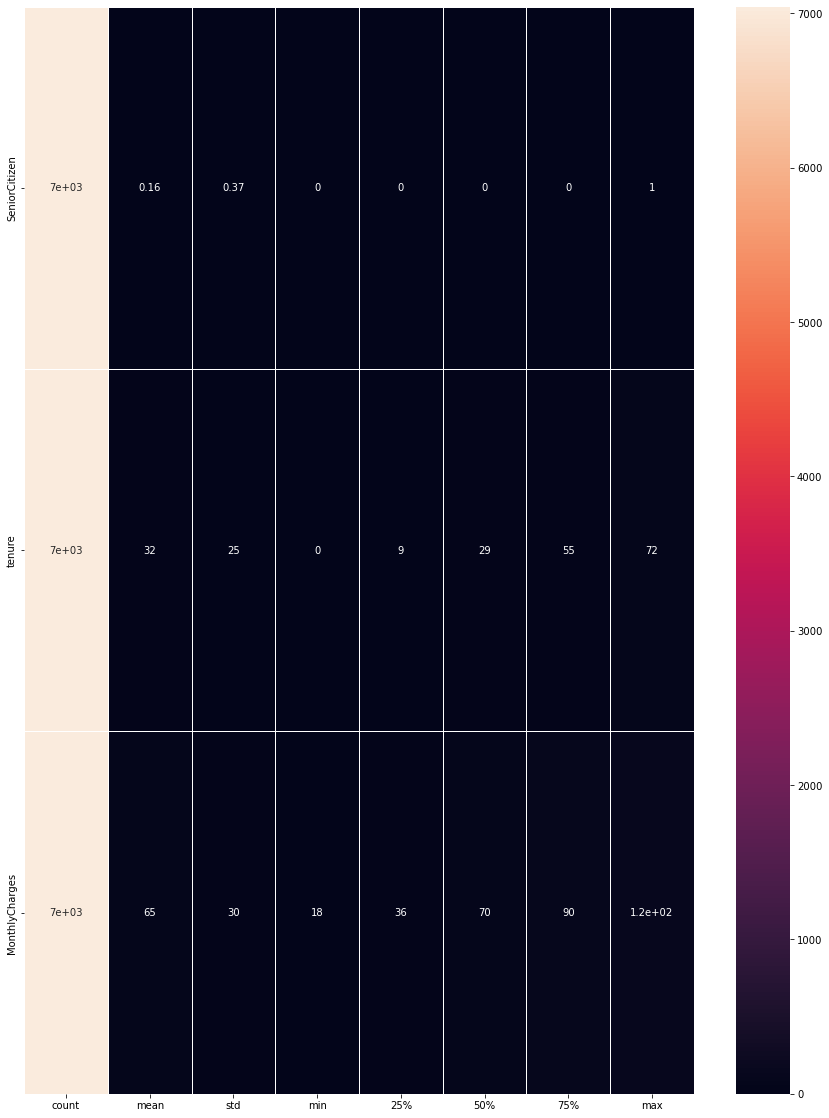

In [23]:
describe=data.describe().T
plt.figure(figsize=(15,20))
sns.heatmap(data=describe,annot=True,linewidths=0.5)
plt.show()

# categorising the columns before EDA

In [24]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
data_cat=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']].copy()

In [26]:
data_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [27]:
data_numerical=data[['tenure','MonthlyCharges', 'TotalCharges']].copy()

In [28]:
data_numerical

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.5
7039,72,103.20,7362.9
7040,11,29.60,346.45
7041,4,74.40,306.6


# EDA

# Univariate Analysis.

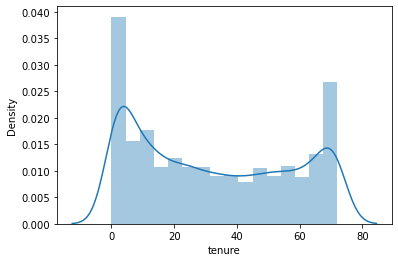

In [29]:
sns.distplot(data_numerical['tenure'])
plt.show()
    
        

In [30]:
# The Tenure starts from0 to 75 and the Data is scattered.

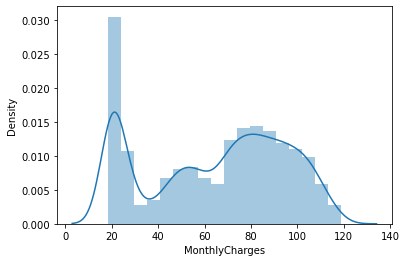

In [31]:
sns.distplot(data_numerical['MonthlyCharges'])
plt.show()

In [32]:
# the Data density is skewed from 120 amount.
# follows normal distributionfrom 20 to 40.

In [33]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [34]:
data_numerical['TotalCharges'].isin([' ','N/A','n/a','-']).any() # we found that there is a special character.

True

In [35]:
data.loc[data['TotalCharges']==' '] # Locating the rows where there is widespace.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [36]:
data['TotalCharges']=data['TotalCharges'].replace(" ",np.nan) # replacing it will Nan
data['TotalCharges'].isnull().sum() # checking the Null Values.

11

In [37]:
data['TotalCharges']=data['TotalCharges'].fillna(0)
data['TotalCharges']   # Filled the Null values with Zero

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [38]:
data['TotalCharges']=data['TotalCharges'].astype(float) # converting the object datatype into float. to check the distribution
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

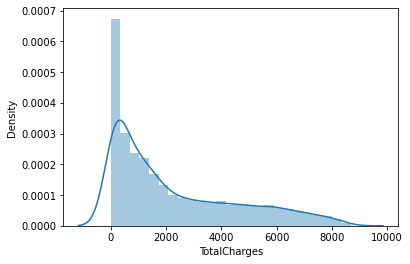

In [39]:
# checking the Distribution:
sns.distplot(data['TotalCharges'])
plt.show()  

In [40]:
# The Data follows normal distribution from 2000 to 4000 and follows right skewness.

# # Analysis for categorical columns

In [41]:
data_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Male      3555
Female    3488
Name: gender, dtype: int64


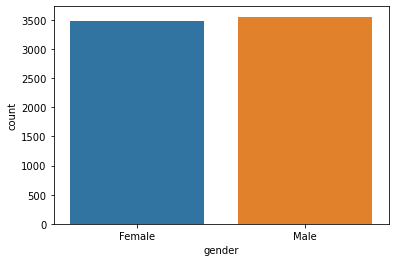

In [42]:
print(data_cat['gender'].value_counts())
sns.countplot(x=data_cat['gender'])
plt.show()

In [43]:
# We Have Male customers more compared to the female.


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


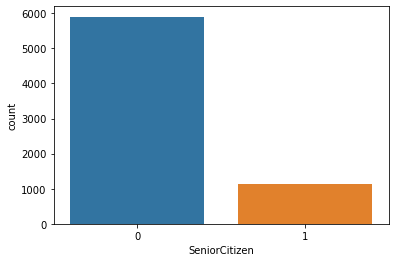

In [44]:
print(data_cat['SeniorCitizen'].value_counts())
sns.countplot(x=data_cat['SeniorCitizen'])
plt.show()

In [45]:
# Considering the Values 0 as non Senior citizen and 1 as Senior Citizen.
# we have 5901 customers (Non senior Citizen) and 1142 senior citizen customers in our Dataset.

No     3641
Yes    3402
Name: Partner, dtype: int64


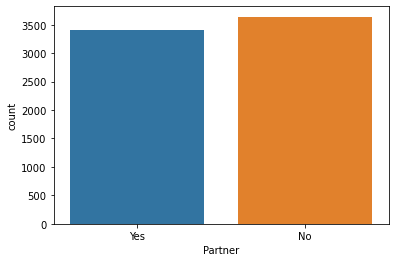

In [46]:
print(data_cat['Partner'].value_counts())
sns.countplot(x=data_cat['Partner'])
plt.show()

In [47]:
# we have more Customers who doesnt have Partners than one with Partner.

Yes    6361
No      682
Name: PhoneService, dtype: int64


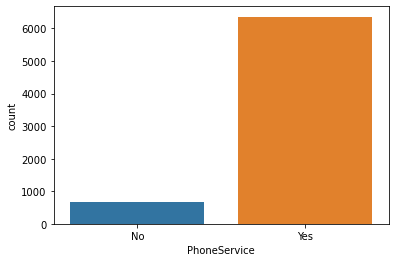

In [48]:
print(data_cat['PhoneService'].value_counts())
sns.countplot(x=data_cat['PhoneService'])
plt.show()

In [49]:
# we have More customers who have taken with PhoneService(6361)  with us.

No     4933
Yes    2110
Name: Dependents, dtype: int64


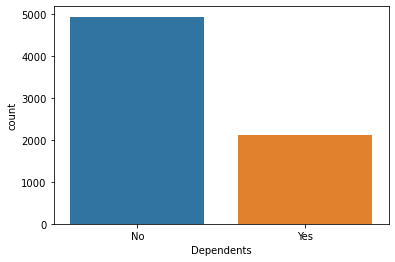

In [50]:
print(data_cat['Dependents'].value_counts())
sns.countplot(x=data_cat['Dependents'])
plt.show()

In [51]:
# we have More customers with No Dependents(4933),comparing to the one with Dependents (2110)


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


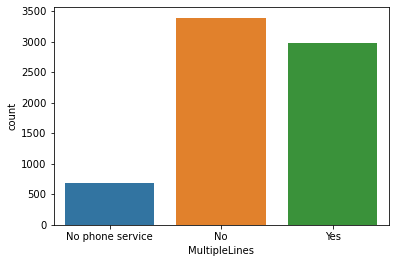

In [52]:
print(data_cat['MultipleLines'].value_counts())
sns.countplot(x=data_cat['MultipleLines'])
plt.show()

In [53]:
# we have more customers with No for Multiple Lines.
# we have 2971 customers with yes for Multiple lInes.
# we have 682 customers with No Phone Lines.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


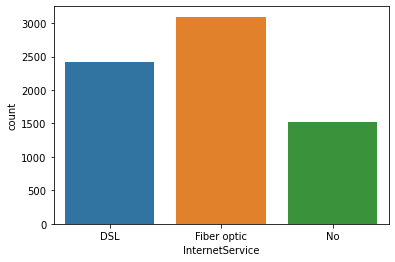

In [54]:
print(data_cat['InternetService'].value_counts())
sns.countplot(x=data_cat['InternetService'])
plt.show()

In [55]:
# we have more customers who have taken Fiber optic Internet Services,(3096 customers total),Dsl -2421 cutomers and No internet Service 1526 customers.

In [56]:
data_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


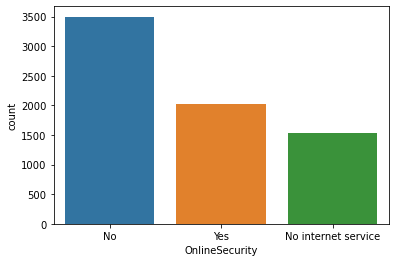

In [57]:
print(data_cat['OnlineSecurity'].value_counts())
sns.countplot(x=data_cat['OnlineSecurity'])
plt.show()

In [58]:
# we have  more customers (3498) have not opted Online Security services.
# we have 2019 customers who have opted for online Security services.
# we have 1526 customers who have opted for No Internet service.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


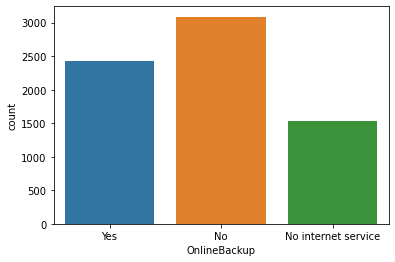

In [59]:
print(data_cat['OnlineBackup'].value_counts())
sns.countplot(x=data_cat['OnlineBackup'])
plt.show()

In [60]:
# we have 3088 customers who have opted No for Online Backup
# we have 2429 customers who have opted yes for Online Backup.
# we have 1526 customers who have opted for No Internet Service .

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


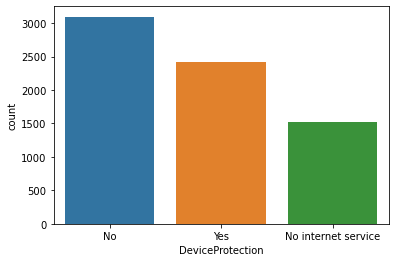

In [61]:
print(data_cat['DeviceProtection'].value_counts())
sns.countplot(x=data_cat['DeviceProtection'])
plt.show()

In [62]:
# we have 3095 customers who have opted No for Device Protection.
# we have 2422 customers who have opted Yes for Device Protection.
# We have 1526 customers with No Internet Service.


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


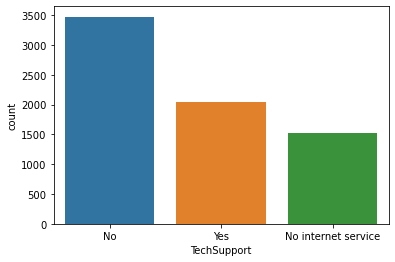

In [63]:
print(data_cat['TechSupport'].value_counts())
sns.countplot(x=data_cat['TechSupport'])
plt.show()

In [64]:
# we have  3473 customers who opted No for Techsupport.
# we have 2044 customers who opted Yes for Techsupport.
# we have 1526 customers who have No internet services.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


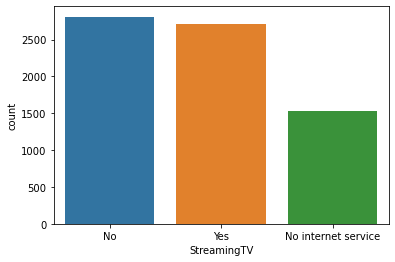

In [65]:
print(data_cat['StreamingTV'].value_counts())
sns.countplot(x=data_cat['StreamingTV'])
plt.show()

In [66]:
# we have 2810 customers,opted  No for Streaming TV.
# we have 2707 customers,opted Yes for Streaming TV.
# We have 1526 customers with No internet service.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


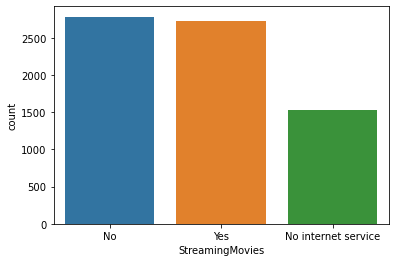

In [67]:
print(data_cat['StreamingMovies'].value_counts())
sns.countplot(x=data_cat['StreamingMovies'])
plt.show()

In [68]:
# we have 2732 opted yes for Streaming Movies.
# we have 2785 opted No for  Streaming Movies.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


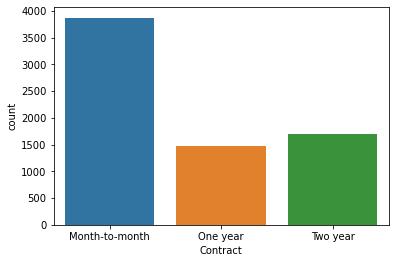

In [69]:
print(data_cat['Contract'].value_counts())
sns.countplot(x=data_cat['Contract'])
plt.show()

In [70]:
# we have 3875 customers who have given Month to Month contract.
# we have 1695 customers who have taken Two year contract.
# we have 1473 customers who have taken One year contract.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


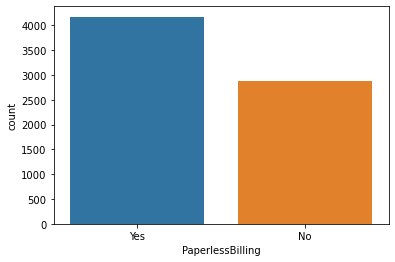

In [71]:
print(data_cat['PaperlessBilling'].value_counts())
sns.countplot(x=data_cat['PaperlessBilling'])
plt.show()

In [72]:
# we have 4171 customers who have opted yes for PaperlessBilling.
# We have 2872 customers who have opted No for PaperlessBilling. 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


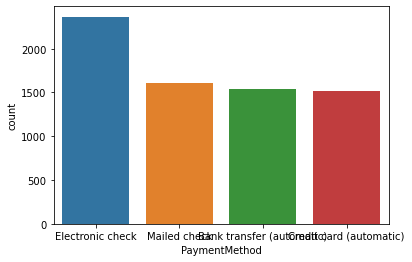

In [73]:
print(data_cat['PaymentMethod'].value_counts())
sns.countplot(x=data_cat['PaymentMethod'])
plt.show()

In [74]:
# we have 2365 customers who have have taken ECheck as payment method.
# we have 1612 customers ,who have taken M check as payment method.
# we have 1544 customers ,who have taken Bank Transfer as payment method..
# we have 1522 customers,who have taken Credit Card as payment method.

No     5174
Yes    1869
Name: Churn, dtype: int64


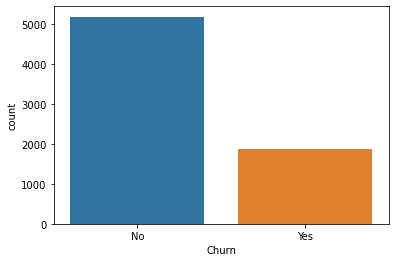

In [75]:
# Analyzing the Target Column.

print(data_cat['Churn'].value_counts())
sns.countplot(x=data_cat['Churn'])
plt.show()

In [76]:
# we have 5174 customers who wish to continue the same.
# we have 1879 customers not to continue the same.

# Bivariate and Multivariate Analysis

In [77]:
data_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

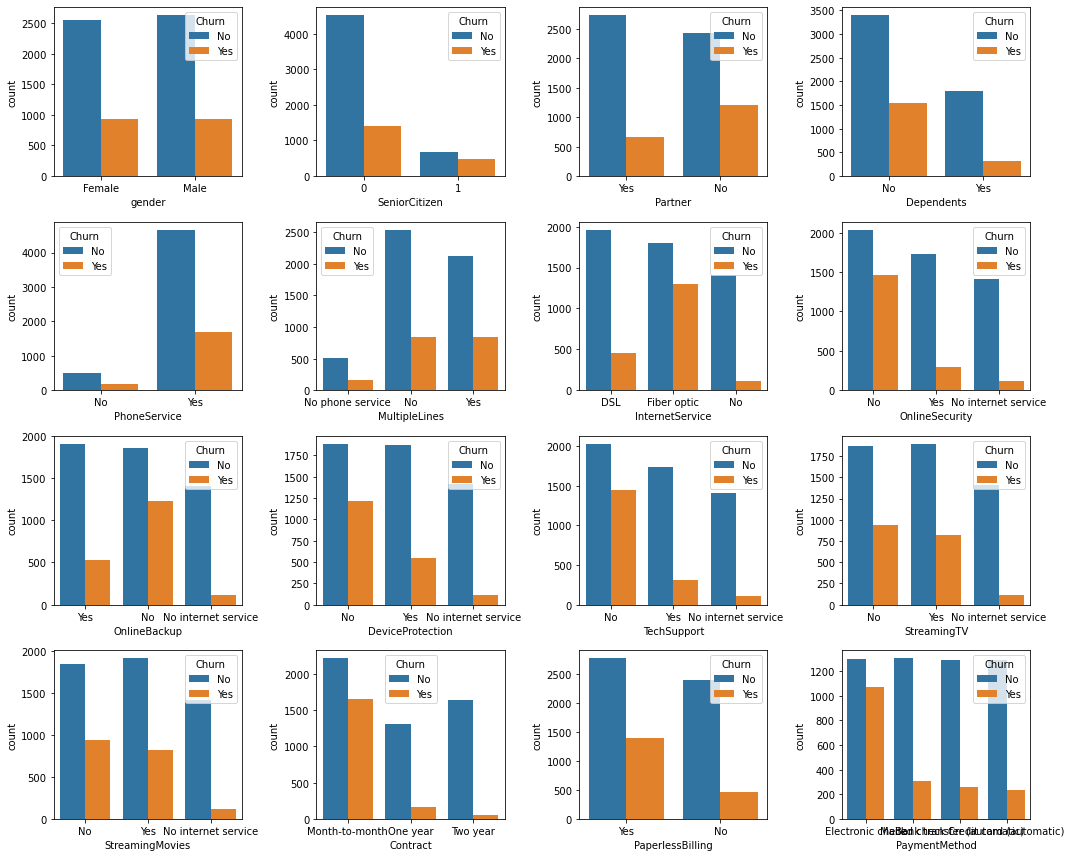

In [78]:
fig,axes=plt.subplots(4,4,figsize=(15,12))

sns.countplot('gender',hue="Churn", data= data_cat, ax=axes[0,0])
sns.countplot('SeniorCitizen',hue="Churn", data= data_cat, ax=axes[0,1] )
sns.countplot('Partner',hue="Churn", data= data_cat, ax=axes[0,2] )
sns.countplot('Dependents',hue="Churn", data= data_cat, ax=axes[0,3] )
sns.countplot('PhoneService',hue="Churn", data= data_cat, ax=axes[1,0])
sns.countplot('MultipleLines',hue="Churn", data= data_cat, ax=axes[1,1])
sns.countplot('InternetService',hue="Churn", data= data_cat, ax=axes[1,2] )
sns.countplot('OnlineSecurity',hue="Churn", data= data_cat, ax=axes[1,3] )
sns.countplot('OnlineBackup',hue="Churn", data= data_cat, ax=axes[2,0])
sns.countplot('DeviceProtection',hue="Churn", data= data_cat, ax=axes[2,1])
sns.countplot('TechSupport',hue="Churn", data= data_cat, ax=axes[2,2] )
sns.countplot('StreamingTV',hue="Churn", data= data_cat, ax=axes[2,3] )
sns.countplot('StreamingMovies',hue="Churn", data= data_cat, ax=axes[3,0])
sns.countplot('Contract',hue="Churn", data= data_cat, ax=axes[3,1])
sns.countplot('PaperlessBilling',hue="Churn", data= data_cat, ax=axes[3,2] )
sns.countplot('PaymentMethod',hue="Churn", data= data_cat, ax=axes[3,3] )

plt.tight_layout()
plt.show()

In [79]:
#observations:
# we have Male churn count more compared to the female.
# we have more people, without SeniorCitizen opted yes for churn
# those who are with No partners have more churn.
# those who are with No Dependents have more churn.
# lots of people have opted for Phone Service and they wish to continue the churn.
# Those who have opted No for multiple lines,and they have more churn.
# Those who have opted Fibreoptic,have more churn withus.
# Those who have opted  no for OnlineSecurity ,have more churn with us
# Those who have opted no for online Backup,have more churn with us,
# Those who have opted no for Deviceprotection,have more churn with us.


In [80]:
data_numerical.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

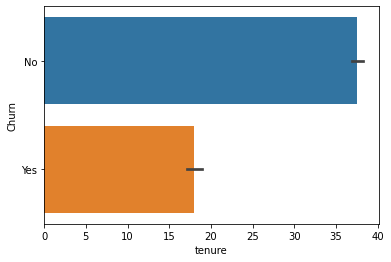

In [81]:
sns.barplot(x=data_numerical['tenure'],y=data['Churn'])
plt.show()

In [82]:
# observations:
# if the tenure is decreased way,the churn increases
# if the tenure increases,churn decreases

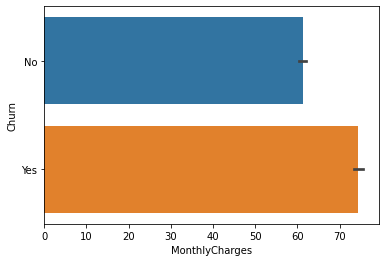

In [83]:
sns.barplot(x=data_numerical['MonthlyCharges'],y=data['Churn'])
plt.show()

In [84]:
# if the Monthly charges is within the limit of (0-60),we have both churn yes and churn No customers.
# if the Montly charges is above 60,then we have only churn yes customers.


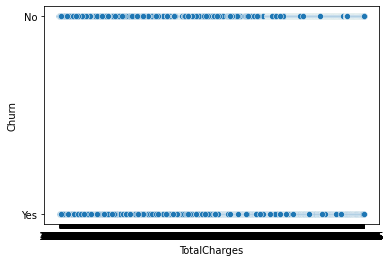

In [85]:
sns.scatterplot(x=data_numerical['TotalCharges'],y=data['Churn'])
plt.show()

In [86]:
# there is no  trend  of Increasing or decreasing like,data is scattered 

# Encoding categorical columns

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le=LabelEncoder() # using Label Encoder for all categorical columns.

In [89]:
for i in data_cat.columns:
    data_cat[i]=le.fit_transform(data_cat[i])
    

In [90]:
data_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [91]:
data_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [92]:
#removed all the categorical columns from dataset
data.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod','Churn'],axis=1,inplace=True)

In [93]:
data

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [94]:
data=pd.concat([data,data_cat],axis=1)
data

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2,53.85,108.15,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,72,103.20,7362.90,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,11,29.60,346.45,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,4,74.40,306.60,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


# correlation

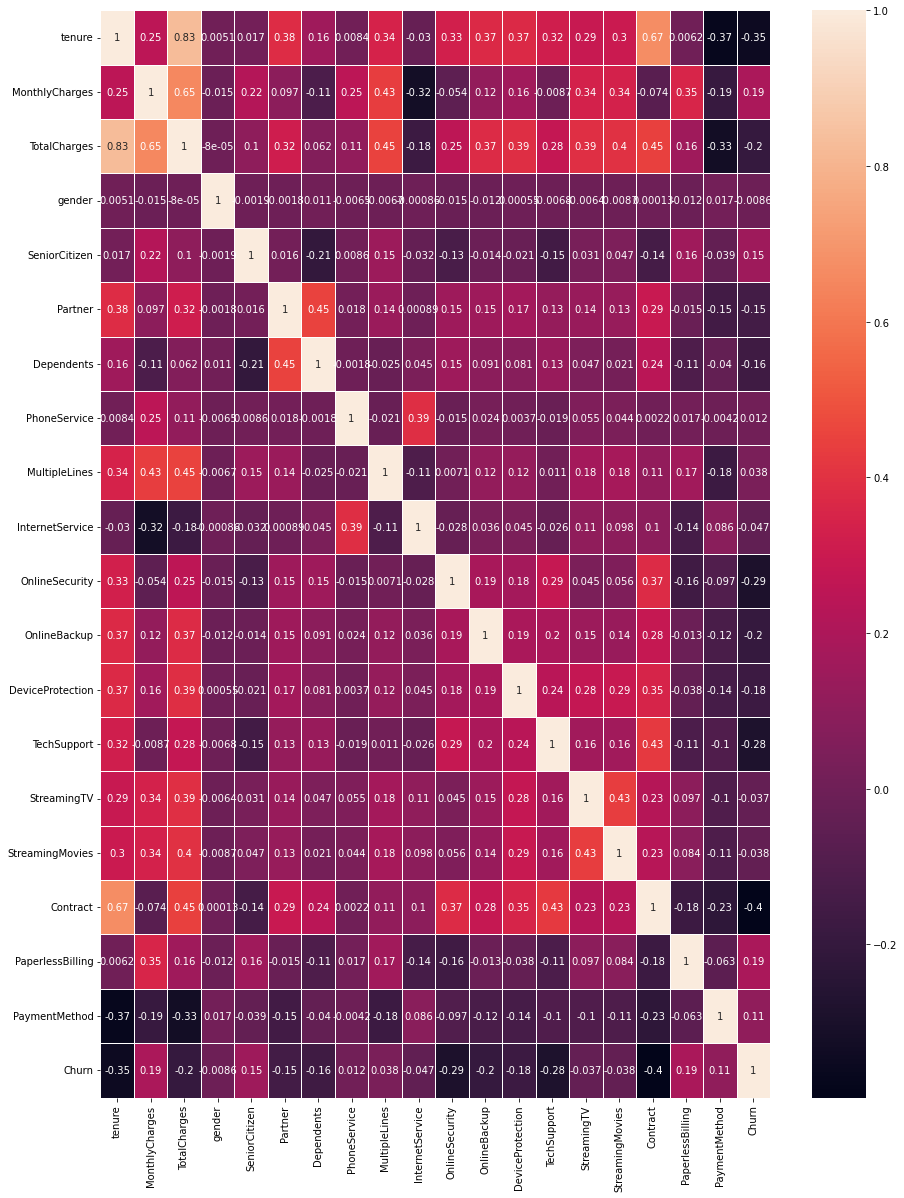

In [95]:
corr=data.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [96]:
corr['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

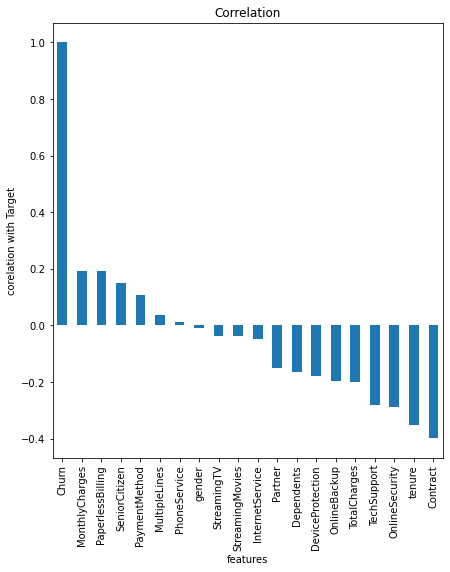

In [97]:
plt.figure(figsize=(7,8))
corr['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('corelation with Target')
plt.title('Correlation')
plt.show()

In [98]:
# after analyzing the coefficient,deleting the columns,Phoneservices,gender,streaming Tv,streaming Movies,internetservice ,partner,dependents from the Dataset.


In [99]:
#Deleting these columns:
deletedcolumns=pd.DataFrame()
deletedcolumns['ColumnNames']=['MultipleLines','PhoneService','gender',
                              'StreamingTV','StreamingMovies','InternetService','Partner','Dependents']
deletedcolumns['Corelation with target']=[0.03,0.01,-0.00,-0.03,-0.03,-0.04,-0.15,-0.16]
deletedcolumns

,ColumnNames,Corelation with target
0,MultipleLines,0.03
1,PhoneService,0.01
2,gender,-0.00
3,StreamingTV,-0.03
4,StreamingMovies,-0.03
5,InternetService,-0.04
6,Partner,-0.15
7,Dependents,-0.16


In [100]:
data.drop(columns=['MultipleLines','PhoneService','gender','StreamingTV','StreamingMovies','InternetService','Partner','Dependents'],axis=1,inplace=True)
data

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,0,0,2,0,0,0,1,2,0
1,34,56.95,1889.50,0,2,0,2,0,1,0,3,0
2,2,53.85,108.15,0,2,2,0,0,0,1,3,1
3,45,42.30,1840.75,0,2,0,2,2,1,0,0,0
4,2,70.70,151.65,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,2,0,2,2,1,1,3,0
7039,72,103.20,7362.90,0,0,2,2,0,1,1,1,0
7040,11,29.60,346.45,0,2,0,0,0,0,1,2,0
7041,4,74.40,306.60,1,0,0,0,0,0,1,3,1


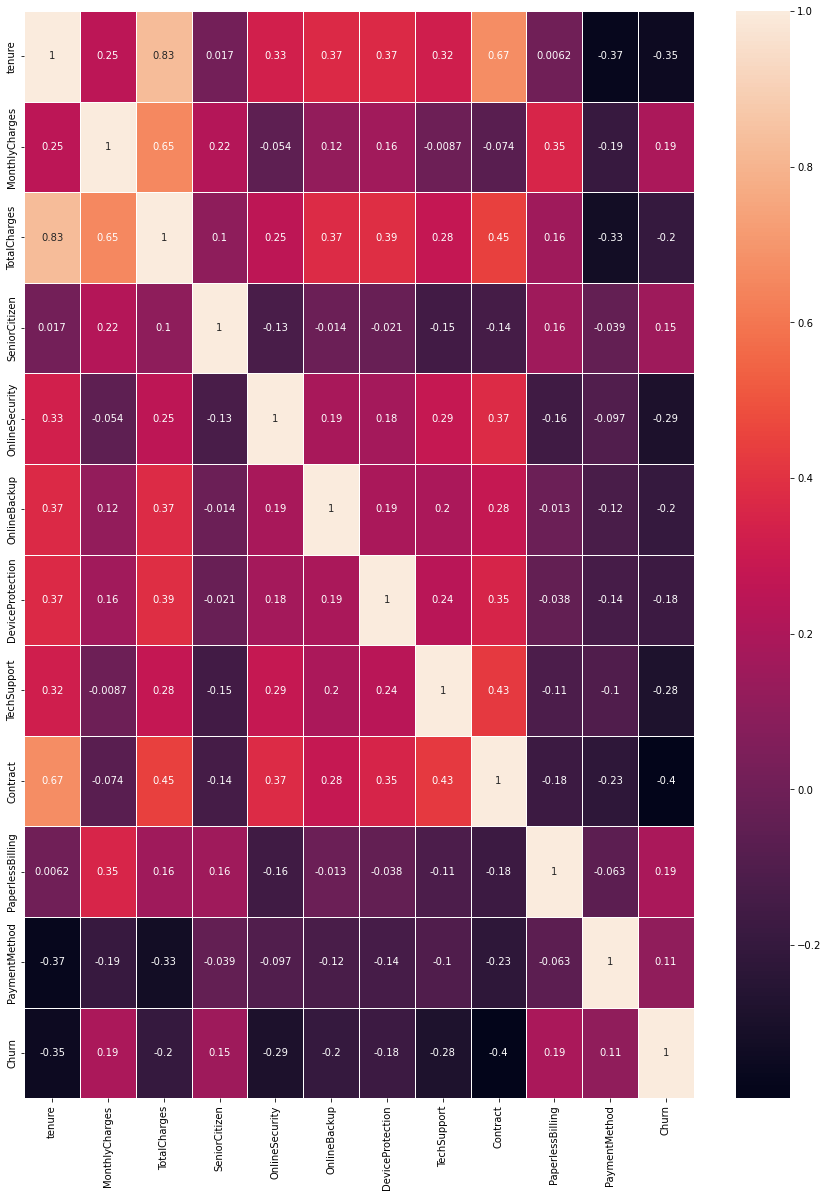

In [101]:
# After removing the columns,rechecking corelation.
corr1=data.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr1,annot=True,linewidths=0.5)
plt.show()

In [102]:
# Monthly charges and total Charges are highly correlated.
# Monthly charge contributing =0.1 to Target 
# Total Charges is contributing =-0.19 T target.
# Decided to drop "Total Charges" column to avoid Multicollinearity.

In [103]:
data.drop(columns=['TotalCharges'],axis=1,inplace=True)
data

,tenure,MonthlyCharges,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,0,0,2,0,0,0,1,2,0
1,34,56.95,0,2,0,2,0,1,0,3,0
2,2,53.85,0,2,2,0,0,0,1,3,1
3,45,42.30,0,2,0,2,2,1,0,0,0
4,2,70.70,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,2,0,2,2,1,1,3,0
7039,72,103.20,0,0,2,2,0,1,1,1,0
7040,11,29.60,0,2,0,0,0,0,1,2,0
7041,4,74.40,1,0,0,0,0,0,1,3,1


# Selecting best Features using Kbest method.

In [104]:
# To Select the Best Features Using SelectK Best Method.
from sklearn.feature_selection import SelectKBest, f_classif

In [105]:
x=data.drop(columns=['Churn'],axis=1)
x

,tenure,MonthlyCharges,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,0,0,2,0,0,0,1,2
1,34,56.95,0,2,0,2,0,1,0,3
2,2,53.85,0,2,2,0,0,0,1,3
3,45,42.30,0,2,0,2,2,1,0,0
4,2,70.70,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,2,0,2,2,1,1,3
7039,72,103.20,0,0,2,2,0,1,1,1
7040,11,29.60,0,2,0,0,0,0,1,2
7041,4,74.40,1,0,0,0,0,0,1,3


In [106]:
y=data['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [107]:
data.columns


Index(['tenure', 'MonthlyCharges', 'SeniorCitizen', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [108]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)
best_score=pd.concat([score,columns],axis=1)
best_score.columns=['score','columnname']
best_score

,score,columnname
0,997.268010,tenure
1,273.463704,MonthlyCharges
2,164.041424,SeniorCitizen
3,643.162019,OnlineSecurity
4,279.877370,OnlineBackup
5,230.744618,DeviceProtection
6,610.610024,TechSupport
7,1315.088872,Contract
8,268.985218,PaperlessBilling
9,81.641664,PaymentMethod


In [109]:
best_score.sort_values('score',ascending=False) # sorting the scores 

,score,columnname
7,1315.088872,Contract
0,997.268010,tenure
3,643.162019,OnlineSecurity
6,610.610024,TechSupport
4,279.877370,OnlineBackup
1,273.463704,MonthlyCharges
8,268.985218,PaperlessBilling
5,230.744618,DeviceProtection
2,164.041424,SeniorCitizen
9,81.641664,PaymentMethod


In [110]:
# Payment Method is giving less score in Feature selection and corelation ,it is giving 0.19 with targer,hence 
# removing 'Paymentmethod' column also.

In [111]:
data.drop(columns=['PaymentMethod'],axis=1,inplace=True)
data

,tenure,MonthlyCharges,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
0,1,29.85,0,0,2,0,0,0,1,0
1,34,56.95,0,2,0,2,0,1,0,0
2,2,53.85,0,2,2,0,0,0,1,1
3,45,42.30,0,2,0,2,2,1,0,0
4,2,70.70,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,2,0,2,2,1,1,0
7039,72,103.20,0,0,2,2,0,1,1,0
7040,11,29.60,0,2,0,0,0,0,1,0
7041,4,74.40,1,0,0,0,0,0,1,1


# Outliers

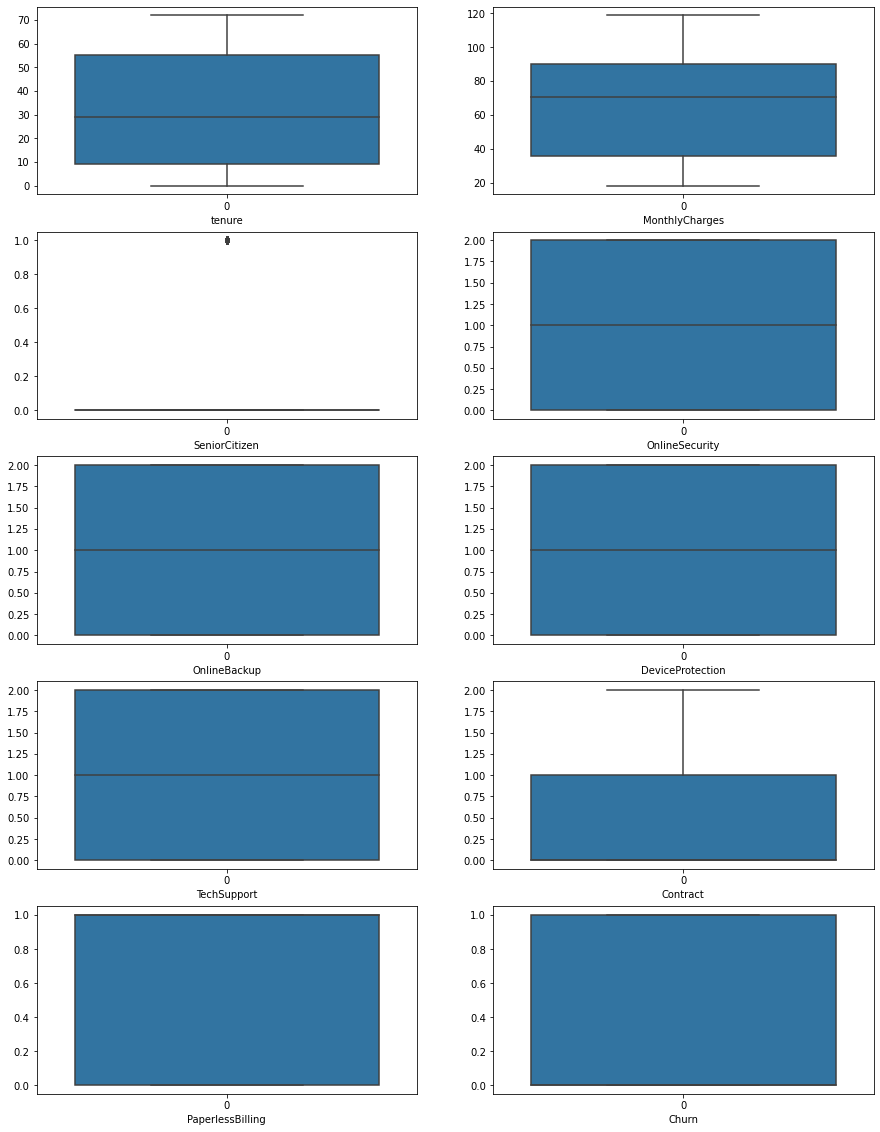

In [112]:
# seeing the outliers using boxplot.
plt.figure(figsize=(15,20))
plotnumber=1
for columns in data:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        ax=sns.boxplot(data=data[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()


In [113]:
# Outliers are not present in the columns.

# Skewness check

In [114]:
x=data.drop(columns=['Churn'],axis=1)
x

,tenure,MonthlyCharges,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling
0,1,29.85,0,0,2,0,0,0,1
1,34,56.95,0,2,0,2,0,1,0
2,2,53.85,0,2,2,0,0,0,1
3,45,42.30,0,2,0,2,2,1,0
4,2,70.70,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,2,0,2,2,1,1
7039,72,103.20,0,0,2,2,0,1,1
7040,11,29.60,0,2,0,0,0,0,1
7041,4,74.40,1,0,0,0,0,0,1


In [115]:
x.skew()

tenure              0.239540
MonthlyCharges     -0.220524
SeniorCitizen       1.833633
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
Contract            0.630959
PaperlessBilling   -0.375396
dtype: float64

In [116]:
# we can see that data is skewed,we will use transformation techniques to convert the same

In [117]:
from sklearn.preprocessing import PowerTransformer

In [118]:
# applying powerTransformer
pt=PowerTransformer()
pwr=pt.fit_transform(x)
data_pwr=pd.DataFrame(data=pwr,columns=x.columns)
data_pwr

,tenure,MonthlyCharges,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling
0,-1.644343,-1.158541,-0.439916,-0.977199,1.161936,-1.077012,-0.983227,-0.888524,0.829798
1,0.297205,-0.239492,-0.439916,1.258702,-1.078800,1.163539,-0.983227,0.790424,-1.205113
2,-1.495444,-0.342665,-0.439916,1.258702,1.161936,-1.077012,-0.983227,-0.888524,0.829798
3,0.646327,-0.731079,-0.439916,1.258702,-1.078800,1.163539,1.252625,0.790424,-1.205113
4,-1.495444,0.213545,-0.439916,-0.977199,-1.078800,-1.077012,-0.983227,-0.888524,0.829798
...,...,...,...,...,...,...,...,...,...
7038,-0.078084,0.671510,-0.439916,1.258702,-1.078800,1.163539,1.252625,0.790424,0.829798
7039,1.342198,1.260981,-0.439916,-0.977199,1.161936,1.163539,-0.983227,0.790424,0.829798
7040,-0.725121,-1.167241,-0.439916,1.258702,-1.078800,-1.077012,-0.983227,-0.888524,0.829798
7041,-1.265130,0.334312,2.273159,-0.977199,-1.078800,-1.077012,-0.983227,-0.888524,0.829798


In [119]:
# Rechecking the skewness
data_pwr.skew()

tenure             -0.243325
MonthlyCharges     -0.259035
SeniorCitizen       1.833633
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
Contract            0.302174
PaperlessBilling   -0.375396
dtype: float64

In [120]:
# though the skewness is removed,still ill check the same with quantile transformer method.

In [121]:
from sklearn.preprocessing import QuantileTransformer

In [122]:
# applying quantile Transformer Techniques.
qt=QuantileTransformer()
qua=qt.fit_transform(x)
data_qua=pd.DataFrame(data=qua,columns=x.columns)
data_qua

,tenure,MonthlyCharges,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling
0,0.045045,0.233734,0.0,0.0,1.0,0.0,0.0,0.000000,1.0
1,0.549550,0.393821,0.0,1.0,0.0,1.0,0.0,0.654655,0.0
2,0.105606,0.355063,0.0,1.0,1.0,0.0,0.0,0.000000,1.0
3,0.648649,0.268262,0.0,1.0,0.0,1.0,1.0,0.654655,0.0
4,0.105606,0.507508,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
7038,0.449449,0.683684,0.0,1.0,0.0,1.0,1.0,0.654655,1.0
7039,1.000000,0.903403,0.0,0.0,1.0,1.0,0.0,0.654655,1.0
7040,0.286787,0.231231,0.0,1.0,0.0,0.0,0.0,0.000000,1.0
7041,0.163163,0.541041,1.0,0.0,0.0,0.0,0.0,0.000000,1.0


In [123]:
# checking the skewness
data_qua.skew()

tenure              0.027150
MonthlyCharges     -0.000049
SeniorCitizen       1.833633
OnlineSecurity      0.260116
OnlineBackup        0.113600
DeviceProtection    0.116033
TechSupport         0.250890
Contract            0.404100
PaperlessBilling   -0.375396
dtype: float64

# Checking Multicollinearity using VIF.

In [124]:
# Since power Transformer technique  already used standarization ,we dont have to use standard scaler for our dataset.


In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data_pwr,i) for i in range(data_pwr.shape[1])]
vif['Columns']=x.columns
vif

,VIF,Columns
0,2.184253,tenure
1,1.384384,MonthlyCharges
2,1.096623,SeniorCitizen
3,1.319699,OnlineSecurity
4,1.182514,OnlineBackup
5,1.230485,DeviceProtection
6,1.357634,TechSupport
7,2.258538,Contract
8,1.195070,PaperlessBilling


In [127]:
# Vif Values are less than 10,we can proceed with the same.

In [128]:
x=data_pwr
x

,tenure,MonthlyCharges,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling
0,-1.644343,-1.158541,-0.439916,-0.977199,1.161936,-1.077012,-0.983227,-0.888524,0.829798
1,0.297205,-0.239492,-0.439916,1.258702,-1.078800,1.163539,-0.983227,0.790424,-1.205113
2,-1.495444,-0.342665,-0.439916,1.258702,1.161936,-1.077012,-0.983227,-0.888524,0.829798
3,0.646327,-0.731079,-0.439916,1.258702,-1.078800,1.163539,1.252625,0.790424,-1.205113
4,-1.495444,0.213545,-0.439916,-0.977199,-1.078800,-1.077012,-0.983227,-0.888524,0.829798
...,...,...,...,...,...,...,...,...,...
7038,-0.078084,0.671510,-0.439916,1.258702,-1.078800,1.163539,1.252625,0.790424,0.829798
7039,1.342198,1.260981,-0.439916,-0.977199,1.161936,1.163539,-0.983227,0.790424,0.829798
7040,-0.725121,-1.167241,-0.439916,1.258702,-1.078800,-1.077012,-0.983227,-0.888524,0.829798
7041,-1.265130,0.334312,2.273159,-0.977199,-1.078800,-1.077012,-0.983227,-0.888524,0.829798


In [129]:
x.shape

(7043, 9)

In [130]:
y.shape

(7043,)

# PCA

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca=PCA()

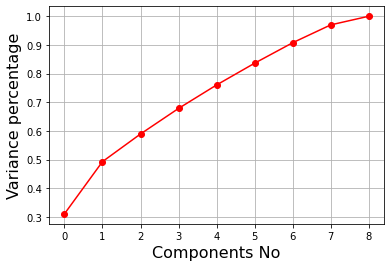

In [133]:
x_pca = pca.fit_transform(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Components No', fontsize= 16)
plt.ylabel('Variance percentage', fontsize= 16)
plt.grid()
plt.show()

In [134]:
# components=7 covers 95% of the Data.
pca_new=PCA(n_components=7)
comp=pca_new.fit_transform(x)
comp

array([[-1.90065248, -0.88952866, -0.38668175, ..., -0.7698399 ,
        -0.73753418, -0.1830852 ],
       [ 0.95889033, -0.79771901,  0.36049872, ..., -0.045558  ,
         1.25336987, -1.36875406],
       [-1.0510194 , -0.70969059, -0.32515118, ...,  0.36025211,
        -0.36560211, -1.61012429],
       ...,
       [-1.36876343, -1.27959235, -0.43484199, ...,  1.49735171,
         0.04761431, -1.42777778],
       [-2.94702535,  0.88083867,  1.35026   , ...,  0.81094723,
        -0.49047129,  0.22093314],
       [ 2.02743134,  1.27348036, -1.16856315, ...,  1.26746808,
         0.01873147, -0.24624137]])

In [135]:
x1=pd.DataFrame(comp)
x1

,0,1,2,3,4,5,6
0,-1.900652,-0.889529,-0.386682,-1.867988,-0.769840,-0.737534,-0.183085
1,0.958890,-0.797719,0.360499,1.509914,-0.045558,1.253370,-1.368754
2,-1.051019,-0.709691,-0.325151,-2.032995,0.360252,-0.365602,-1.610124
3,2.027316,-1.235750,0.170055,1.653358,0.526536,0.003584,-0.117383
4,-2.640518,-0.314943,-0.907248,0.028054,0.186083,0.079560,0.010363
...,...,...,...,...,...,...,...
7038,1.256058,0.343983,-1.051728,1.443374,1.062505,-0.784878,-0.565273
7039,0.792233,2.221797,-0.810366,-0.198810,-1.457437,0.716487,-0.193316
7040,-1.368763,-1.279592,-0.434842,-0.314923,1.497352,0.047614,-1.427778
7041,-2.947025,0.880839,1.350260,0.220602,0.810947,-0.490471,0.220933


# SMOTE for Classification

In [136]:
#our Target variable is imbalanced,applying over sampling Techniques.
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [137]:
from imblearn.over_sampling import SMOTE

In [138]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [139]:
y.value_counts()  # rechecking the Target Variable after resampling

0    5174
1    5174
Name: Churn, dtype: int64

In [140]:
x.shape

(10348, 9)

# Model Building

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [142]:
# To select Random state,and to find where the accuracy rate is high.
lr=LogisticRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At Random State",i)
        print("The Training score is:",accuracy_score(y_train,pred_train)*100)
        print("The Test Score is :",accuracy_score(y_test,pred_test)*100)

At Random State 0
The Training score is: 77.0132714856333
The Test Score is : 76.57518361035949
At Random State 2
The Training score is: 76.85865223553667
The Test Score is : 76.88442211055276
At Random State 5
The Training score is: 76.8199974230125
The Test Score is : 77.34827986084267
At Random State 8
The Training score is: 76.80711248550445
The Test Score is : 76.69114804793196
At Random State 9
The Training score is: 77.0648112356655
The Test Score is : 76.6524932354078
At Random State 10
The Training score is: 76.62672336039171
The Test Score is : 77.46424429841515
At Random State 16
The Training score is: 76.98750161061719
The Test Score is : 76.92307692307693
At Random State 24
The Training score is: 76.67826311042391
The Test Score is : 77.34827986084267
At Random State 29
The Training score is: 76.7942275479964
The Test Score is : 77.07769617317356
At Random State 31
The Training score is: 76.8199974230125
The Test Score is : 76.8457672980286
At Random State 33
The Training 

In [143]:
# Choosing Random State=407,and fitting the Model.

In [144]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=407)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test)*100)
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

77.425589485891
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1273
           1       0.76      0.81      0.78      1314

    accuracy                           0.77      2587
   macro avg       0.78      0.77      0.77      2587
weighted avg       0.78      0.77      0.77      2587

[[ 939  334]
 [ 250 1064]]


 # Cross_validation

In [145]:
from sklearn.model_selection import cross_val_score

In [146]:
for j in range(2,10):
    lss_score=cross_val_score(lr,x,y,cv=j)
    print(lss_score)
    lsc_score=lss_score.mean()
    print("At CV Fold,:",j)
    print("Cross Valid Score is:",lsc_score*100)
    print("Accuracy Score is :",accuracy_score(y_test,pred_test)*100)
    print("The Difference between the Cross Val score and accuracy is:",accuracy_score(y_test,pred_test)*100-lsc_score*100)

[0.7674913  0.76517201]
At CV Fold,: 2
Cross Valid Score is: 76.63316582914572
Accuracy Score is : 77.425589485891
The Difference between the Cross Val score and accuracy is: 0.7924236567452709
[0.75710145 0.76253987 0.77442737]
At CV Fold,: 3
Cross Valid Score is: 76.46895620518724
Accuracy Score is : 77.425589485891
The Difference between the Cross Val score and accuracy is: 0.9566332807037554
[0.76536529 0.76923077 0.75647468 0.77425589]
At CV Fold,: 4
Cross Valid Score is: 76.63316582914572
Accuracy Score is : 77.425589485891
The Difference between the Cross Val score and accuracy is: 0.7924236567452709
[0.76811594 0.75845411 0.76956522 0.75930401 0.7781537 ]
At CV Fold,: 5
Cross Valid Score is: 76.67185949477332
Accuracy Score is : 77.425589485891
The Difference between the Cross Val score and accuracy is: 0.7537299911176802
[0.76521739 0.74782609 0.77913043 0.74956522 0.77030162 0.78074246]
At CV Fold,: 6
Cross Valid Score is: 76.54638689935774
Accuracy Score is : 77.425589485891

In [147]:
# Choosing Cv=5,As the difference between the cross valscore and the accuracy is less.

In [148]:
# Defining a Function for getting Model score:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvs=cross_val_score(algorithm,x,y,cv=5)
    cvc=cvs.mean()
    print("The Model Name is ",algorithm)
    print("The Accuracy score of the Model Training Data:",accuracy_score(y_train,pred_algo_train)*100)
    print("The Accuracy score of the Model Test Data:",accuracy_score(y_test,pred_algo_test)*100)
    print("The Cross Valid Score of the Algorithm:",cvc*100)
    print("The Classification report of the Model is :",classification_report(y_test,pred_algo_test))
    print("The Confusion Matrix is :",confusion_matrix(y_test,pred_algo_test))
    print("The Difference between Cross Val score and Accuracy score is: ",accuracy_score(y_test,pred_algo_test)*100-cvc*100)
    

# DecisionTreeClassifier

In [149]:
# Training the Model with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [150]:
dt=DecisionTreeClassifier()

In [151]:
model_selection(dt,x_train,x_test,y_train,y_test)

The Model Name is  DecisionTreeClassifier()
The Accuracy score of the Model Training Data: 99.51037237469397
The Accuracy score of the Model Test Data: 76.88442211055276
The Cross Valid Score of the Algorithm: 76.69166882645354
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.76      0.77      0.77      1273
           1       0.78      0.76      0.77      1314

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587

The Confusion Matrix is : [[ 985  288]
 [ 310 1004]]
The Difference between Cross Val score and Accuracy score is:  0.19275328409922565


# using GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
parameters={'criterion' : ["gini", "entropy"],'max_depth':range(2,5),'min_samples_leaf':[0.1,1,0.01],'min_samples_split':range(2,5)}

In [154]:
grd_dt=GridSearchCV(dt,param_grid=parameters)
grd_dt.fit(x_train,y_train)
print(grd_dt.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [155]:
dt_hyper=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 1, min_samples_split= 2)


In [156]:
model_selection(dt_hyper,x_train,x_test,y_train,y_test)

The Model Name is  DecisionTreeClassifier(max_depth=4)
The Accuracy score of the Model Training Data: 77.4771292359232
The Accuracy score of the Model Test Data: 75.68612292230382
The Cross Valid Score of the Algorithm: 76.98143050272834
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.77      0.72      0.75      1273
           1       0.75      0.79      0.77      1314

    accuracy                           0.76      2587
   macro avg       0.76      0.76      0.76      2587
weighted avg       0.76      0.76      0.76      2587

The Confusion Matrix is : [[ 922  351]
 [ 278 1036]]
The Difference between Cross Val score and Accuracy score is:  -1.2953075804245202


In [157]:
# The Test score is decreased after GridsearchCV.

# KNeighborsClassifier

In [158]:
from sklearn.neighbors import KNeighborsClassifier

In [159]:
knc=KNeighborsClassifier()

In [160]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Model Name is  KNeighborsClassifier()
The Accuracy score of the Model Training Data: 85.2209766782631
The Accuracy score of the Model Test Data: 78.93312717433321
The Cross Valid Score of the Algorithm: 78.74004805233923
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.81      0.75      0.78      1273
           1       0.77      0.83      0.80      1314

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

The Confusion Matrix is : [[ 953  320]
 [ 225 1089]]
The Difference between Cross Val score and Accuracy score is:  0.19307912199397492


# GridSearch Cv for KNC

In [161]:
parameters={'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':range(2,5),'leaf_size':range(10,40)}

In [162]:
grd_knc=GridSearchCV(knc,param_grid=parameters)
grd_knc.fit(x_train,y_train)
print(grd_knc.best_params_)

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 3}


In [163]:
knc_hyper=KNeighborsClassifier(algorithm= 'auto', leaf_size= 25, n_neighbors= 3)

In [164]:
model_selection(knc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  KNeighborsClassifier(leaf_size=25, n_neighbors=3)
The Accuracy score of the Model Training Data: 88.79010436799382
The Accuracy score of the Model Test Data: 80.67259373792038
The Cross Valid Score of the Algorithm: 79.64837268815246
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1273
           1       0.79      0.85      0.82      1314

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587

The Confusion Matrix is : [[ 975  298]
 [ 202 1112]]
The Difference between Cross Val score and Accuracy score is:  1.0242210497679167


In [165]:
# The Test Score accuracy is improved after using GridSearchCV.

# SVM Classifier

In [166]:
from sklearn.svm import  SVC

In [167]:
svc=SVC()

In [168]:
model_selection(svc,x_train,x_test,y_train,y_test)

The Model Name is  SVC()
The Accuracy score of the Model Training Data: 77.74771292359232
The Accuracy score of the Model Test Data: 77.2323154232702
The Cross Valid Score of the Algorithm: 77.11645804292957
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1273
           1       0.76      0.82      0.78      1314

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587

The Confusion Matrix is : [[ 927  346]
 [ 243 1071]]
The Difference between Cross Val score and Accuracy score is:  0.11585738034062842


# GridsearchCV(SVM)

In [169]:
parameters={'kernel' : ['linear', 'poly', 'rbf'],'gamma' : ['scale', 'auto'],'C':[0.001,0.1,1.0]}


In [170]:
grd_svc=GridSearchCV(svc,param_grid=parameters)
grd_svc.fit(x_train,y_train)
print(grd_svc.best_params_)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [171]:
svc_hyper=SVC(C= 1.0, gamma= 'scale', kernel= 'rbf')

In [172]:
model_selection(svc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  SVC()
The Accuracy score of the Model Training Data: 77.74771292359232
The Accuracy score of the Model Test Data: 77.2323154232702
The Cross Valid Score of the Algorithm: 77.11645804292957
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1273
           1       0.76      0.82      0.78      1314

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587

The Confusion Matrix is : [[ 927  346]
 [ 243 1071]]
The Difference between Cross Val score and Accuracy score is:  0.11585738034062842


In [173]:
# there is No change in the Test score after using GridSearch Cv

# Ensemble Techniques

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [175]:
rf=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

In [176]:
model_selection(rf,x_train,x_test,y_train,y_test)

model_selection(gbc,x_train,x_test,y_train,y_test)

model_selection(ada,x_train,x_test,y_train,y_test)

model_selection(xgb,x_train,x_test,y_train,y_test)

The Model Name is  RandomForestClassifier()
The Accuracy score of the Model Training Data: 99.51037237469397
The Accuracy score of the Model Test Data: 81.8708929261693
The Cross Valid Score of the Algorithm: 82.02601083862774
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1273
           1       0.82      0.82      0.82      1314

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

The Confusion Matrix is : [[1045  228]
 [ 241 1073]]
The Difference between Cross Val score and Accuracy score is:  -0.15511791245843654
The Model Name is  GradientBoostingClassifier()
The Accuracy score of the Model Training Data: 80.68547867542843
The Accuracy score of the Model Test Data: 79.59025898724391
The Cross Valid Score of the Algorithm: 79.20419909265604
The Classification report of the 

# GridsearchCvRandomForestClassifier

In [177]:
parameters={'criterion' : ["gini", "entropy"],'max_depth':range(2,5),'min_samples_leaf':[0.1,1,0.01],
            'min_samples_split':range(2,5),'n_estimators':range(10,60,10)}

In [178]:
grd_rf=GridSearchCV(rf,param_grid=parameters)
grd_rf.fit(x_train,y_train)
print(grd_rf.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}


In [179]:
rf_hyper=RandomForestClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf= 1, min_samples_split= 4, n_estimators= 20)

In [180]:
model_selection(rf_hyper,x_train,x_test,y_train,y_test)

The Model Name is  RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=4,
                       n_estimators=20)
The Accuracy score of the Model Training Data: 77.16789073572993
The Accuracy score of the Model Test Data: 78.00541167375337
The Cross Valid Score of the Algorithm: 76.73954371291879
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.83      0.70      0.76      1273
           1       0.75      0.86      0.80      1314

    accuracy                           0.78      2587
   macro avg       0.79      0.78      0.78      2587
weighted avg       0.79      0.78      0.78      2587

The Confusion Matrix is : [[ 889  384]
 [ 185 1129]]
The Difference between Cross Val score and Accuracy score is:  1.2658679608345835


In [181]:
# Before hyper Tuning,random_forest gives best score.

# Grid Search Cv for Gradient Boosting Classifier

In [182]:
parameters={'learning_rate':[0.1,0.001,0.01],'min_samples_split':range(2,5),'max_depth':range(2,5)}

In [183]:
grd_gbc=GridSearchCV(gbc,param_grid=parameters)
grd_gbc.fit(x_train,y_train)
print(grd_gbc.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}


In [184]:
gbc_hyper=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4, min_samples_split= 4)

In [185]:
model_selection(gbc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  GradientBoostingClassifier(max_depth=4, min_samples_split=4)
The Accuracy score of the Model Training Data: 83.32689086457931
The Accuracy score of the Model Test Data: 79.89949748743719
The Cross Valid Score of the Algorithm: 80.16095899206832
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1273
           1       0.79      0.83      0.81      1314

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

The Confusion Matrix is : [[ 974  299]
 [ 221 1093]]
The Difference between Cross Val score and Accuracy score is:  -0.2614615046311286


In [186]:
# slight imporovement,in the test Score after GridsearchCv.

# GridSearch Cv for AdaBoostClassifier

In [187]:
parameters={'n_estimators':range(10,60,10),'learning_rate':[0.1,0.001,0.01]}

In [188]:
grd_Ada=GridSearchCV(ada,param_grid=parameters)
grd_Ada.fit(x_train,y_train)
print(grd_Ada.best_params_)

{'learning_rate': 0.1, 'n_estimators': 50}


In [189]:
grd_ada=AdaBoostClassifier(learning_rate= 0.1, n_estimators=50)

In [190]:
model_selection(grd_ada,x_train,x_test,y_train,y_test)

The Model Name is  AdaBoostClassifier(learning_rate=0.1)
The Accuracy score of the Model Training Data: 76.75557273547223
The Accuracy score of the Model Test Data: 76.92307692307693
The Cross Valid Score of the Algorithm: 76.749303614666
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.82      0.68      0.74      1273
           1       0.74      0.85      0.79      1314

    accuracy                           0.77      2587
   macro avg       0.78      0.77      0.77      2587
weighted avg       0.78      0.77      0.77      2587

The Confusion Matrix is : [[ 871  402]
 [ 195 1119]]
The Difference between Cross Val score and Accuracy score is:  0.17377330841092942


In [191]:
# The Model Gives best score before hyperTuning.

# GridSearchCV for XGBclassifier

In [192]:
parameters={'learning_rate':[0.1,0.001,0.01],'max_depth':range(2,5),'n_estimators':range(10,60,10)}

In [193]:
grd_xgb=GridSearchCV(xgb,param_grid=parameters)
grd_xgb.fit(x_train,y_train)
print(grd_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


In [194]:
xgb_hyper=XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 50)

In [195]:
model_selection(xgb_hyper,x_train,x_test,y_train,y_test)

The Model Name is  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
The Accuracy score of the Model Training Data: 80.54374436283985
The Accuracy score of the Model Test Data: 79.5129493621956
The Cross Valid Score of the Algorithm: 79.16548637232857
The Classification report of the Model is :        

In [196]:
#Model gives best score before hyperTuning.

#                                           AUC_ROC_CURVE.

In [197]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import plot_roc_curve

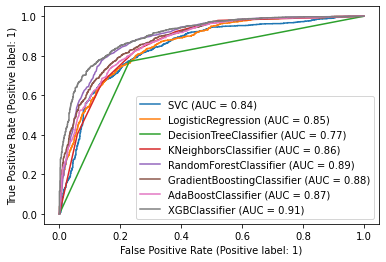

In [198]:
disp=plot_roc_curve(svc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [199]:
models=pd.DataFrame()

In [201]:
models

,Model_Name,Test_Score,Cv_Score,Difference,Test_score_hyper,Cv_Score_hyper,Difference_hyper
0,Logistic_Regression,77.42,76.67,0.70,-,-,-
1,Decision_tree,76.88,76.69,0.19,75.68,76.98,1.29
2,Knc,78.93,78.84,0.19,80.67,79.64,1.02
3,SVM,77.23,77.11,0.11,77.23,77.11,0.115
4,Random_forest,81.87,82.02,0.15,78.0,76.73,1.26
5,GBC,79.59,79.20,0.30,79.89,80.16,0.2
6,Ada,78.62,78.66,0.03,76.92,76.74,0.17
7,XGB,82.45,82.18,0.26,79.51,79.16,0.34


In [202]:
# Choosing Ada before hyper Tuning as the Best model as the difference between the cross_val score and test score is very less.

# Model saving

In [203]:
import pickle

In [204]:
filename='Customer_churn.pkl'
pickle.dump(ada,open(filename,'wb'))

# conclusion

In [205]:
loaded_model=pickle.load(open('Customer_churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

78.62388867413993


In [207]:
prediction=loaded_model.predict(x_test)
a=np.array(y_test)
predicted=np.array(prediction)
conclusion=pd.DataFrame({'Actual':a,'predicted':predicted})
conclusion

,Actual,predicted
0,0,1
1,1,1
2,1,1
3,0,1
4,0,0
...,...,...
2582,0,1
2583,0,0
2584,0,0
2585,1,1
